<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/db_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales_list = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def var_calc(mylist, sample_or_pop='population'):
  '''
  Takes in a list and returns that list's mean, 
  variance, and standard deviation. Can also include
  sample or population input: optional. This controls
  the calculation based around the sample size.
  '''

  mean = sum(mylist)/len(mylist) # Calculates the list's mean
  distances = list(map(lambda x: x - mean, mylist)) # Calculates the distances of each value in the list from the mean
  squared_distances = list(map(lambda x: x**2, distances)) # Squares the distances
  if sample_or_pop == 'sample': # Controls variance calculation based on sample size; sample or population
    list_length= len(squared_distances)-1 # Finds the length of the squared distances list
    variance = sum(squared_distances)/list_length # Calculates the list's variance
  elif sample_or_pop == 'population': # Controls variance calculation based on sample size; sample or population
    list_length = len(squared_distances) # Finds the length of the squared distances list
    variance = sum(squared_distances)/list_length # Calculates the list's variance
  stand_dev = math.sqrt(variance) # Calculates the list's standard deviation
  return mean, variance, stand_dev 

In [6]:
var_calc(sales_list)
print('mean:', '{:.2f}'.format(var_calc(sales_list)[0]))
print('variance:', '{:.2f}'.format(var_calc(sales_list)[1]))
print('stand dev:', '{:.2f}'.format(var_calc(sales_list)[2]))

mean: 3052.71
variance: 183761.06
stand dev: 428.67


In [7]:
# Let's use numpy to check that our function worked
print('mean:', '{:.2f}'.format(np.mean(sales_list)))
print('variance:', '{:.2f}'.format(np.var(sales_list)))
print('stand dev:', '{:.2f}'.format(np.std(sales_list)))

mean: 3052.71
variance: 183761.06
stand dev: 428.67


In [8]:
# Perfect, we know that it works for calculating for a population as a whole!
# To calculate a sample we simply change the sample_or_pop paramater in our 
# function and the ddof parameter in the numpy function:
print('sample variance:', '{:.2f}'.format(var_calc(sales_list, 'sample')[1]))
print('sample variance:', '{:.2f}'.format(np.var(sales_list, ddof=1)))

sample variance: 214387.90
sample variance: 214387.90


In [9]:
# Now let's ensure that our function can handle any size list:
test1 = [31, 65342, 123, 7457, 213, 6234, 123325, 8365, 234235, 21, 3, 421, 5, 75]
var_calc(test1)

(31846.428571428572, 4307901804.67347, 65634.60828460447)

In [10]:
test2 = [1, 2]
var_calc(test2)

(1.5, 0.25, 0.5)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# Create our list of visiting customers
customer_visits = [127, 80, 105, 92, 120, 115, 93]

In [12]:
# For the funsies let's put these two lists into a dataframe
sales_df = pd.DataFrame({'sales': sales_list, 'customers': customer_visits})
sales_df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [13]:
# Now find the covariance:
print('covariance:', '{:.2f}'.format(sales_df.cov().values[0][1]))

covariance: 7604.36


In [14]:
# Check that using numpy
print('covariance', '{:.2f}'.format(np.cov(sales_list, customer_visits)[0][1]))

covariance 7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [15]:
# Let's use our function on the customers visited list
var_calc(customer_visits)
print('mean:', '{:.2f}'.format(var_calc(customer_visits)[0]))
print('variance:', '{:.2f}'.format(var_calc(customer_visits)[1]))
print('stand dev:', '{:.2f}'.format(var_calc(customer_visits)[2]))

mean: 104.57
variance: 249.39
stand dev: 15.79


In [16]:
# Check those numbers against the numpy library
print('mean:', '{:.2f}'.format(np.mean(customer_visits)))
print('variance:', '{:.2f}'.format(np.var(customer_visits)))
print('stand dev:', '{:.2f}'.format(np.std(customer_visits)))

mean: 104.57
variance: 249.39
stand dev: 15.79


In [17]:
# Perfect! Let's call two variables and set them to the standard deviation of 
# our sales list and our customer visits list
sales_std = var_calc(sales_list, 'sample')[2]
customer_std = var_calc(customer_visits, 'sample')[2]
print(sales_std, '\n\n', customer_std)

463.0204150595357 

 17.057326313123664


In [18]:
# Calculate the covariance using pandas
sales_cov = sales_df['sales'].cov(sales_df['customers'])
sales_cov

7604.357142857142

In [19]:
# Calculate the covariance using numpy
sales_cov = np.cov(sales_list, customer_visits)[0][1]
sales_cov

7604.357142857142

In [20]:
# Calculate the denominator by multiplying the std of both lists
sales_denom = sales_std * customer_std
sales_denom

7897.890309308459

In [21]:
# Calculate correlation
sales_corr = sales_cov / sales_denom
print('cor coeff:', '{:.2f}'.format(sales_corr))

cor coeff: 0.96


In [22]:
# Let's check our work using pandas
print('cor coeff:', '{:.2f}'.format(sales_df['sales'].corr(sales_df['customers'])))

cor coeff: 0.96


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Set variable to dataset url and create column names
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
column_names = ["pclass","survived","name","sex","age","sibsp","parch","ticket",
                "fare","cabin","embarked","boat","body","home_dest","has_cabin_number"]

In [24]:
# Look at the raw data
!curl https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

"","pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest","has_cabin_number"
"1",1,1,"Allen, Miss. Elisabeth Walton","female",29,0,0,"24160",211.3375,"B5","S","2",NA,"St Louis, MO",1
"2",1,1,"Allison, Master. Hudson Trevor","male",0.9167,1,2,"113781",151.55,"C22 C26","S","11",NA,"Montreal, PQ / Chesterville, ON",1
"3",1,0,"Allison, Miss. Helen Loraine","female",2,1,2,"113781",151.55,"C22 C26","S",NA,NA,"Montreal, PQ / Chesterville, ON",1
"4",1,0,"Allison, Mr. Hudson Joshua Creighton","male",30,1,2,"113781",151.55,"C22 C26","S",NA,135,"Montreal, PQ / Chesterville, ON",1
"5",1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","female",25,1,2,"113781",151.55,"C22 C26","S",NA,NA,"Montreal, PQ / Chesterville, ON",1
"6",1,1,"Anderson, Mr. Harry","male",48,0,0,"19952",26.55,"E12","S","3",NA,"New York, NY",1
"7",1,1,"Andrews, Miss. Kornelia Theodosia","female",63,1,0,"13502",77.9583,"D7","S","10",NA,"Hudson, NY",1
"8",1,0,"Andrews,

In [25]:
# Read in the data to a dataframe
titanic_df = pd.read_csv(url, index_col=0)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [26]:
# Determine only the numeric columns
titanic_df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [27]:
# Let's look at the variance-covariance matrix of the data now
titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [28]:
# Now calculate the correlation for the dataframe
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# For vectors to be orthogonal to each other, their dot product
# must be equal to 0. A synonym for orthogonal is perpendicular.


In [0]:
# Let's create a function that creates a random pair of orthogonal
# vectors based on user input of vector dimensions
def orthogonal_vector_pair(*args):
  vect1 = np.random.randn(args[0]) # Creates random vector based on user input of n dimensions
  vect2 = np.random.randn(args[0]) # Creates random vector based on user input of n dimensions
  if vect1.dot(vect2) != 0:  # Checks if dot product of vectors equals 0; if not, performs a calculation that creates an orthogonal pair
    vect2 -= vect2.dot(vect1) * vect1 / np.linalg.norm(vect1)**2

  return vect1, vect2

In [30]:
# Create a test to check if our function works
test1, test2 = orthogonal_vector_pair(2)
print(test1, '\n\n', test2, '\n\n', '{:.10f}'.format(test1.dot(test2)))

[-0.44337759  1.0507243 ] 

 [-0.97621439 -0.4119364 ] 

 0.0000000000


In [31]:
# Now let's try that with three dimensions
test3, test4 = orthogonal_vector_pair(3)
print(test3, '\n\n', test4, '\n\n', '{:.10f}'.format(test3.dot(test4)))

[ 0.30413378 -0.43409295  0.77836556] 

 [-0.06114357 -0.02129056  0.01201716] 

 -0.0000000000


In [32]:
# Finally let's try that with 5 dimensions
test5, test6 = orthogonal_vector_pair(5)
print(test5, '\n\n', test6, '\n\n', '{:.10f}'.format(test5.dot(test6)))

[ 1.43401827  0.20712487 -0.65642947  1.37200602  0.29835019] 

 [ 1.63106285  0.21300444 -0.34368014 -1.86215553 -0.18034382] 

 -0.0000000000


In [33]:
# Let's create a couple of 2 dimensional vectors
my_vect1, my_vect2 = orthogonal_vector_pair(2)
print(my_vect1, '\n\n', my_vect2, '\n\n', '{:.10f}'.format(my_vect1.dot(my_vect2)))

[-0.38306762 -1.32465381] 

 [ 0.28448721 -0.08226892] 

 -0.0000000000


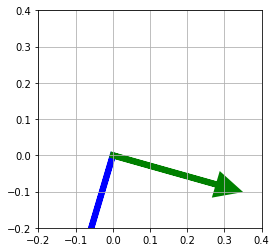

In [34]:
# Now let's graph those vectors
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-.2, .4)
plt.ylim(-.2, .4)
plt.arrow(0, 0, 
         *my_vect1,
          head_width=.05,
          head_length=.05,
          linewidth=6,
          color='blue')
plt.arrow(0, 0,
          *my_vect2,
          head_width=.05,
          head_length=.05,
          linewidth=6,
          color='green')
plt.show()

In [35]:
# Let's create another 2 dimensional vector
my_vect3, my_vect4 = orthogonal_vector_pair(2)
print(my_vect3, '\n\n', my_vect4, '\n\n', '{:.10f}'.format(my_vect3.dot(my_vect4)))

[-0.22362461  1.27583023] 

 [1.11266956 0.19502618] 

 0.0000000000


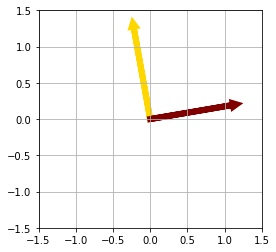

In [36]:
# Graph that
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.arrow(0, 0, 
         *my_vect3,
          head_width=.05,
          head_length=.05,
          linewidth=6,
          color='gold')
plt.arrow(0, 0,
          *my_vect4,
          head_width=.05,
          head_length=.05,
          linewidth=6,
          color='maroon')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [37]:
# First create the vectors
vect_a = np.array([[-5], [3], [7]])
vect_b = np.array([[6], [-8], [2]])
print(vect_a, '\n\n', vect_b)

[[-5]
 [ 3]
 [ 7]] 

 [[ 6]
 [-8]
 [ 2]]


In [38]:
# Check the dot product
vect_a.dot(vect_b)

ValueError: ignored

In [0]:
# Uh-oh! We have a problem. Because the vectors not the required shape
# (the number of rows of vector a does not equal the number of columns
# of vector b) we cannot use the dot product. 

In [40]:
# Let's convert the vectors to 2 dimensional row vectors and graph them
vect_a = np.array([[0, 0, 0, -5, 3, 7]])
vect_b = np.array([[0, 0, 0, 6, -8, 2]])
print(vect_a, '\n\n', vect_b)

[[ 0  0  0 -5  3  7]] 

 [[ 0  0  0  6 -8  2]]


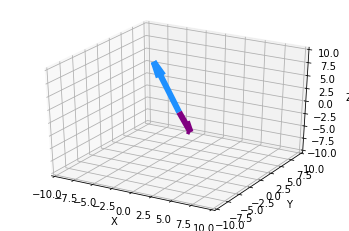

In [43]:
# Graph our vectors
X, Y, Z, U, V, W = zip(*vect_a)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, color='dodgerblue', linewidth=6)
X, Y, Z, U, V, W = zip(*vect_b)
ax.quiver(X, Y, Z, U, V, W, length=1, color='purple', linewidth=6)

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [46]:
# First create our vector
vect_c = np.array([[2, -15, 6, 20]])
print(vect_c)

[[  2 -15   6  20]]


In [58]:
 # Let's calculate the above problems and compare their answers
c_norm_sqr = np.linalg.norm(vect_c) ** 2 # The square of the norm of c
# c_dot_c = vect_c.dot(vect_c) # The dot product of c and c; does not work because the rows and columns are not aligned
c_prod_c = vect_c * vect_c # The product of c and c
c_trans_c = (vect_c.T).dot(vect_c) # The dot product of c transposed and c
print(c_norm_sqr, '\n\n', c_trans_c, '\n\n', c_prod_c)

665.0 

 [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]] 

 [[  4 225  36 400]]


In [60]:
diag_sum = c_trans_c[0][0] + c_trans_c[1][1] + c_trans_c[2][2] + c_trans_c[3][3]
print(diag_sum)

665


In [0]:
# Above we find the connection between the three problems:
# the result of vector c transposed and vector c is equal to a 4 by 4 matrix
# which has a diagonal of values equal to the vector resulting from the 
# product of vector c and vector c; furthermore, the sum of the values 
# in this diagonal (and the c_prod_c vector) is equal to the product of the norm
# of vector c and vector c.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [61]:
# Let's create our vector first
vect_f = np.array([[4, 12, 11, 9, 2]])
print(vect_f)

[[ 4 12 11  9  2]]


In [63]:
# Now let's check its length (norm)
vect_f_norm = np.linalg.norm(vect_f)
print(vect_f_norm)

19.131126469708992


In [64]:
# To find its unit vector we must divide vector f by its norm
f_hat = vect_f / vect_f_norm
print(f_hat)

[[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


In [65]:
# What is the length of this vector?
np.linalg.norm(f_hat) # Very close to 1, which is what we would expect.

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Let's do a couple of imports
import random
import math

In [0]:
# First let's create a funtcion that creates random vectors of user given dimensions
def rand_vect_creator(*args):
  return np.random.randn(args[0])

In [69]:
# Let's create a random 3 dimensional vector now to ensure that our function works
my_vect = rand_vect_creator(3)
print(my_vect)

[ 0.56676225 -0.7196972  -0.76034218]


In [0]:
# Perfect! Now let's make a function that will create a linearly dependent 
# vector from a given vector
def lin_depend_vect(vect, scale):
  return np.multiply(vect, scale)

In [71]:
# Let's use our function to create a linearly dependent vector from the 
# vector we created above:
my_vect2 = lin_depend_vect(my_vect, 3)
print(my_vect2)

[ 1.70028675 -2.15909159 -2.28102655]


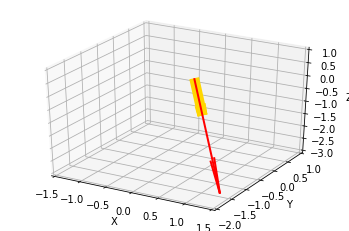

In [146]:
# Let's test the function out by graphing our linearly dependent vectors
from mpl_toolkits.mplot3d import Axes3D

dep_vect_for_graph = np.array([[0, 0, 0, 
                                *my_vect]])
dep_vect_for_graph2 = np.array([[0, 0, 0, 
                                 *my_vect2]])
X, Y, Z, U, V, W = zip(*dep_vect_for_graph)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color='gold',linewidth=10)
X, Y, Z, U, V, W = zip(*dep_vect_for_graph2)
ax.quiver(X, Y, Z, U, V, W, length=1, color='red', linewidth=2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-2, 1])
ax.set_zlim([-3, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [84]:
# Visually we can now see that the vectors are linearly dependent of each other
# Let's create another random set of linearly dependent vectors and graph them
my_vect3 = rand_vect_creator(3)
my_vect4 = lin_depend_vect(my_vect3, 3)
print(my_vect3, '\n\n', my_vect4)

[ 1.63916502 -0.97111216  1.22213456] 

 [ 4.91749505 -2.91333649  3.66640368]


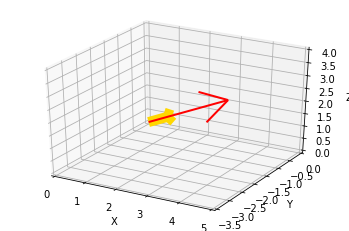

In [147]:
# Now graph that
dep_vect_for_graph = np.array([[0, 0, 0, 
                                *my_vect3]])
dep_vect_for_graph2 = np.array([[0, 0, 0, 
                                 *my_vect4]])
X, Y, Z, U, V, W = zip(*dep_vect_for_graph)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color='gold',linewidth=10)
X, Y, Z, U, V, W = zip(*dep_vect_for_graph2)
ax.quiver(X, Y, Z, U, V, W, length=1, color='red', linewidth=2)
ax.set_xlim([0, 5])
ax.set_ylim([-3.5, 0])
ax.set_zlim([0, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [0]:
# As we can see, that pair of vectors is also visually dependent.

In [112]:
# Let's create a pair of linearly independent vectors now. This is easy because
# we can just input random numbers and we should create independent vectors
ind_vect = np.random.randint(-10, 10, size=3)
ind_vect2 = np.random.randint(-10, 10, size=3)
print(ind_vect, '\n\n', ind_vect2)

[0 6 5] 

 [-1 -1  7]


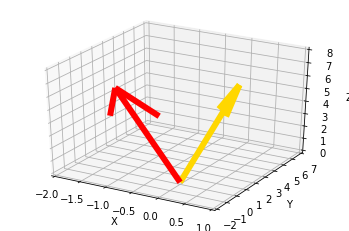

In [116]:
# Now let's graph those vectors
from mpl_toolkits.mplot3d import Axes3D

ind_vect_for_graph = np.array([[0, 0, 0, 
                                *ind_vect]])
ind_vect_for_graph2 = np.array([[0, 0, 0, 
                                 *ind_vect2]])
X, Y, Z, U, V, W = zip(*ind_vect_for_graph)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, color='gold',linewidth=6)
X, Y, Z, U, V, W = zip(*ind_vect_for_graph2)
ax.quiver(X, Y, Z, U, V, W, length=1, color='red', linewidth=6)
ax.set_xlim([-2, 1])
ax.set_ylim([-2, 7])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [149]:
# Now create a second set of linearly independent vectors
ind_vect3 = np.random.randint(-10, 10, size=3)
ind_vect4 = np.random.randint(-10, 10, size=3)
print(ind_vect3, '\n\n', ind_vect4)

[-3 -1 -5] 

 [ 1 -2 -6]


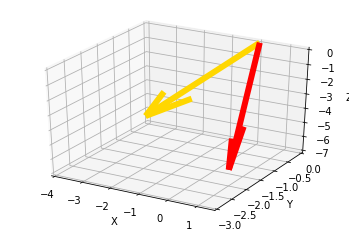

In [151]:
# Now graph them
ind_vect_for_graph = np.array([[0, 0, 0, 
                                *ind_vect3]])
ind_vect_for_graph2 = np.array([[0, 0, 0, 
                                 *ind_vect4]])
X, Y, Z, U, V, W = zip(*ind_vect_for_graph)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, color='gold',linewidth=6)
X, Y, Z, U, V, W = zip(*ind_vect_for_graph2)
ax.quiver(X, Y, Z, U, V, W, length=1, color='red', linewidth=6)
ax.set_xlim([-4, 1.5])
ax.set_ylim([-3, 0])
ax.set_zlim([-7, 0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [0]:
# As we can see, these vectors are also linearly independent

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [158]:
# Create the vectors
g = np.array([1, 2])
h = np.array([4, 8])
print(g)
print(h)

[1 2]
[4 8]


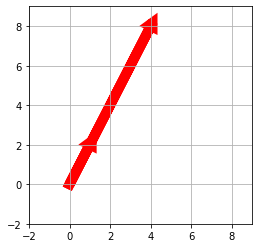

In [161]:
# Now let's plot them
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,9)
plt.ylim(-2,9)

# Display
for myvect in [g, h]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='red')

In [162]:
# Determine one possible linear combination
a,b = (2,3)
linear_combination = np.multiply(g, a) + np.multiply(h, b)
print(linear_combination)

[14 28]


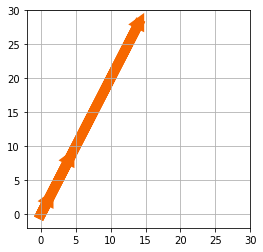

In [163]:
# Check that visually
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,30)
plt.ylim(-2,30)

# Display
for myvect in [g, h, linear_combination]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#F66800')

In [164]:
# Let's find several linear combinations
combo_list = []
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
  linear_combination = np.multiply(g, a) + np.multiply(h, b)
  combo_list.append(linear_combination)
print(combo_list)

[array([14, 28]), array([24, 48]), array([34, 68]), array([44, 88])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [165]:
# First create our vectors
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])
print(l)
print('\n', m)
print('\n', n)

[1 2 3]

 [-1  0  7]

 [4 8 2]


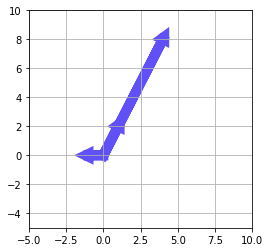

In [166]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)
plt.ylim(-5,10)

# Display
for myvect in [l, m, n]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#5F51F5')

In [167]:
# Let's find some linear combinations
combo_list = []
for (a,b,c) in [(2,3,4), (5,6,7), (8,9,10)]:
  linear_combination = np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, c)
  combo_list.append(linear_combination)
print(combo_list)

[array([15, 36, 35]), array([27, 66, 71]), array([ 39,  96, 107])]


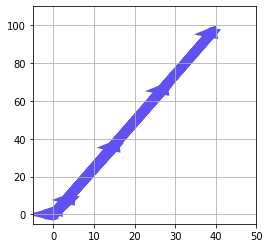

In [168]:
# Let's visualize that
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,50)
plt.ylim(-5,110)

# Display
for myvect in [l, m, n,combo_list[0],combo_list[1],combo_list[2]]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#5F51F5')

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
 # Create our vectors
o = np.array([-12, 14])
p = np.array([12, 14])

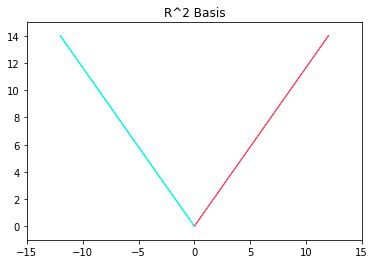

In [170]:
# Plot
plt.arrow(0,0, o[0], o[1], head_width=.05, head_length=.05, color='#00FEE1')
plt.arrow(0,0, p[0], p[1], head_width=.05, head_length=.05, color='#FF4D65')
plt.xlim(-15, 15)
plt.ylim(-1,15)
plt.title("R^2 Basis")
plt.show()

## 6.2 What does it mean to form a basis?

The basis is linearly independent vectors spanning a vector space, denoted V. From the shape of the graph, the vector pair forms a v shape and the space between those two vectors, within the V shape, is the basis. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [171]:
# Create matrix
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
pd.DataFrame(P)

,0,1,2
0,1,2,3
1,-1,0,7
2,4,8,2


In [172]:
# Let's find the rank
np.linalg.matrix_rank(P)

3

In [173]:
# Now create an array with 1s on the diagonal and 0s elsewhere
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 7.2 What does the rank of a matrix tell us?

Matrices may not necessarily span the dimensions their number of rows or columns would have you believe. The rank of a matrix determines that span, telling us the dimension of the vector space spanned by the columns of that matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [174]:
# First create our vectors
v = np.array([1,3])
w = np.array([-1,2])
print(v)
print(w)

[1 3]
[-1  2]


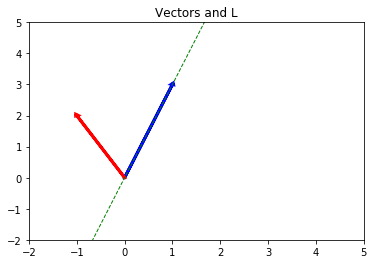

In [175]:
# Let's plot these two vectors first
plt.xlim(-2, 5)
plt.ylim(-2,5)

# Values for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot vectors and L
plt.plot(x_vals, y_vals, '--', color='green', linewidth=1)
plt.arrow(0, 0, v[0], v[1] ,linewidth=3, head_width=.05, head_length=.05, color='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=.05, color='red')

plt.title("Vectors and L")
plt.show()

In [176]:
v_dot_w = np.dot(v, w)
v_dot_v = np.dot(v, v)
projection = np.multiply((v_dot_w / v_dot_v), v)
projection

array([0.5, 1.5])

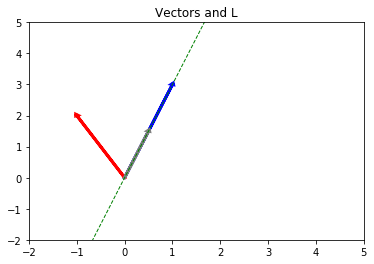

In [177]:
# Now that we can see our L and the v vector, let's project the w vector onto the L
plt.xlim(-2, 5)
plt.ylim(-2,5)

# Values for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot vectors, L, and projection
plt.plot(x_vals, y_vals, '--', color='green', linewidth=1)
plt.arrow(0, 0, v[0], v[1] ,linewidth=3, head_width=.05, head_length=.05, color='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=.05, color='red')
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.05, head_length=.05, color='grey')

plt.title("Vectors and L")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()